Found 17 sample types with 24 total datasets to analyze.
Dataframe filtered to 1 from 24 total datasets
Saving config parameters to output_11Jan2024\hdxms_params_11Jan2024.py


Dataset 0 ( 1 of 1 )
Performing fits for LeuEnk_HI 0001-0005: YGGFL z=1
saving figure as  hdx_ms_hxex3_LeuEnk_HI0001-0005binom_isotope_p05_IndFits_bootNoise0p01_11Jan2024


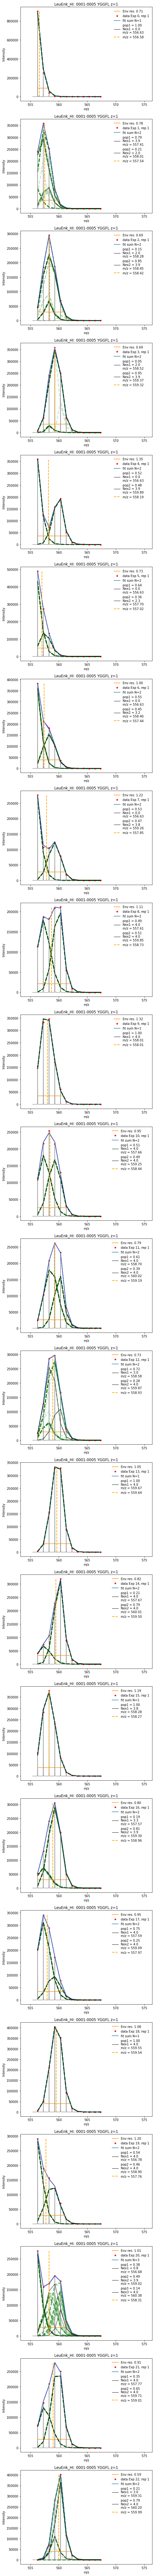

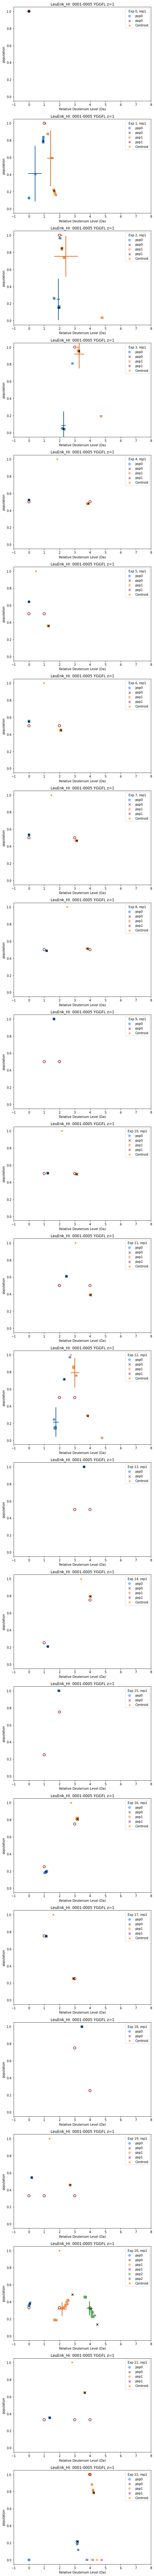

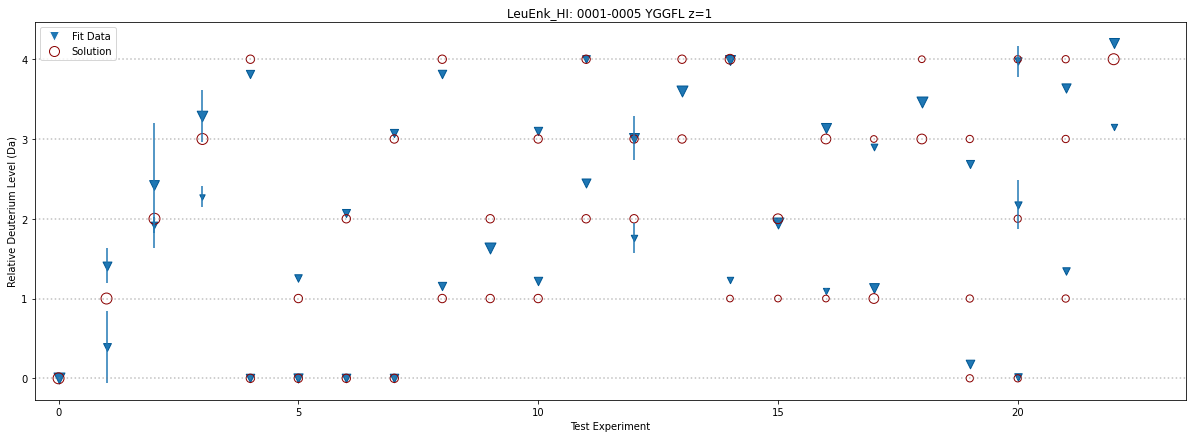

saving figure as  hdx_ms_hxex3_LeuEnk_HI0001-0005binom_isotope_p05_BootFits_bootNoise0p01_11Jan2024
saving figure as  hdx_ms_hxex3_LeuEnk_HI0001-0005binom_isotope_p05_ndeutBoot_bootNoise0p01_11Jan2024
Saving results table to C:\Users\tuttl\OneDrive\Documents\My Documents\KlevitHahn\hdx-ms\pyHXExpress\Bimodal_HDX_Data\output_11Jan2024\data_fits11Jan2024.csv


In [22]:
import os
import importlib
import pyhxexpress as hxex
import numpy as np, pandas as pd
#import config  
#import hdxms_params_22Dec2023 as config
import test_config as config

def hxex_reload():
    importlib.reload(hxex)
    importlib.reload(config)
    hxex.config = config

hxex_reload()
#help(hxex)

hxex.config.Hide_Figure_Output = False

# hxex.config.Output_DIR = os.path.join(config.Data_DIR,'output_fixedpops_'+str(config.date),'')
# if not os.path.exists(hxex.config.Output_DIR): os.makedirs(hxex.config.Output_DIR)


metadf = hxex.get_metadf()
#filtered = metadf[0:1]
filtered = hxex.filter_metadf(metadf,index=[*range(0,1)])#,charge=2, samples='B1B5')
#display(filtered)
hxex.run_hdx_fits(filtered)
#hxex.run_hdx_fits(metadf)

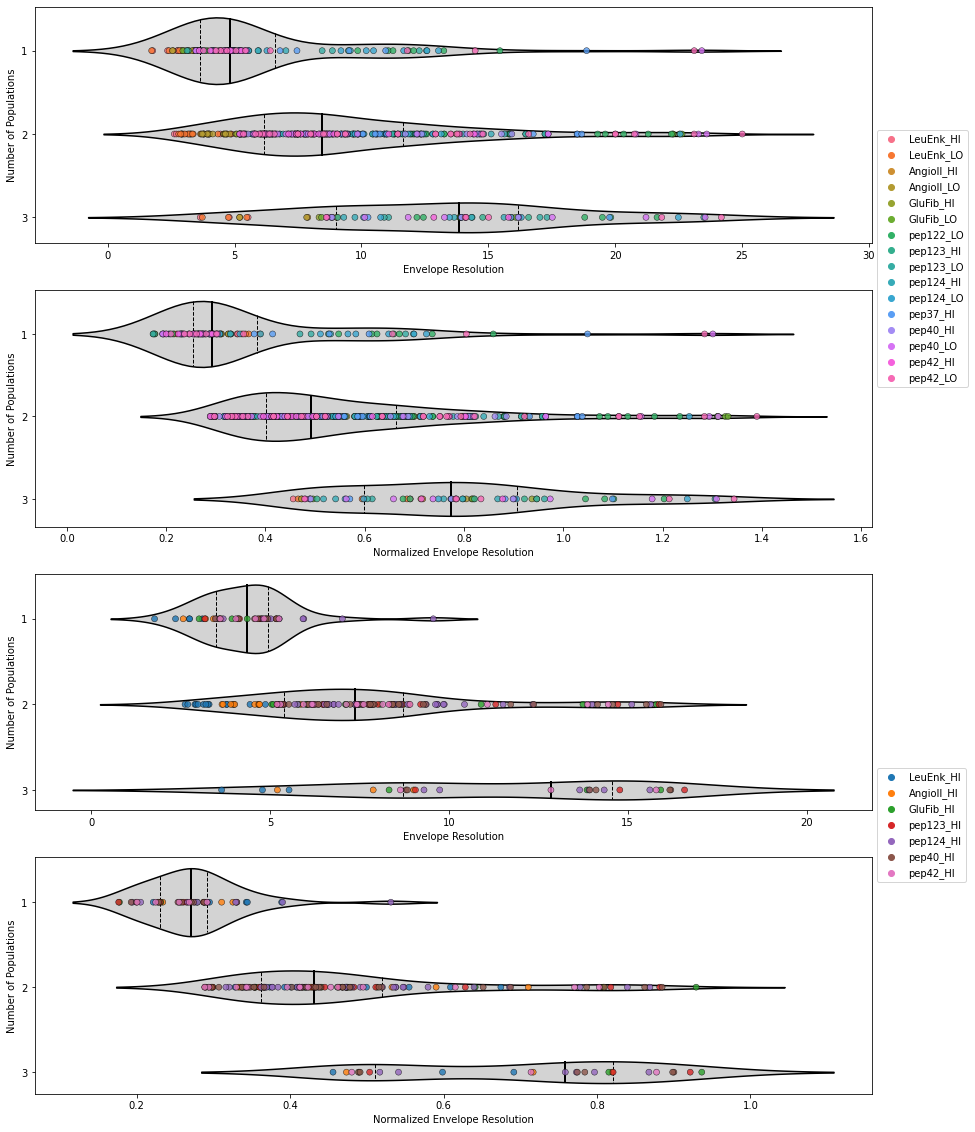

In [3]:
#this would clean up if plotted ~real~ envelopes instead of measured 

# env_res_1 = env_symmetry_adj *charge * (env[1]-env[0]) / ( 2.0 )
# env_symmetry_adj = 2.0 - (y.max() - env_Int)/y.max() # 0 -> assym, 1 -> symm  
                                                       # want 0 to be 2x and 1 to be 1x -> y = -1*x + 2

import seaborn as sns
import matplotlib.pyplot as plt

def patch_edges():
    from matplotlib.collections import PolyCollection
    
    for a in ax.flatten():
        for l in a.lines: #all
            l.set_color('black')
            l.set_linestyle('--')
            l.set_linewidth(1.0)
        for l in a.lines[1::3]: #center
            l.set_linestyle('-')
            l.set_linewidth(2.0)
        for art in a.get_children():
            if isinstance(art,PolyCollection):
                art.set_edgecolor((0.0,0.0,0.0))


all_data = hxex.data_fits.copy()
all_data = all_data[~all_data['sample'].str.contains('Brady')] #bradykinin data is rubbish
all_data['env_res_norm'] = all_data[['env_res_1','peptide']].apply(lambda x: x['env_res_1']/(len(x['peptide'])+3.0),axis=1)

hi_data = all_data.copy()[all_data['sample'].str.contains("HI")]
hi_data = hi_data[~hi_data['sample'].str.contains("pep37")]

fig, ax = plt.subplots(figsize=(15,20), ncols=1, nrows = 4,)# squeeze=False)

sns.violinplot(data=all_data,x='env_res_1',y='solution_npops',orient='h',order=(0,1,2,3,4),ax=ax[0],inner='quart',color='lightgrey')#color='white')
sns.scatterplot(data=all_data,x='env_res_1',y='solution_npops',hue='sample',ax=ax[0],legend=True,zorder=10,edgecolor='black',alpha=0.8)

sns.violinplot(data=hi_data,x='env_res_1',y='solution_npops',orient='h',order=(0,1,2,3,4),ax=ax[2],inner='quart',color='lightgrey');
sns.scatterplot(data=hi_data,x='env_res_1',y='solution_npops',marker='o',hue='sample',ax=ax[2],zorder=10,edgecolor='black',alpha=0.8);


sns.violinplot(data=all_data,x='env_res_norm',y='solution_npops',orient='h',order=(0,1,2,3,4),ax=ax[1],inner='quart',color='lightgrey')
sns.scatterplot(data=all_data,x='env_res_norm',y='solution_npops',hue='sample',ax=ax[1],legend=False,zorder=10,edgecolor='black',alpha=0.8)

sns.violinplot(data=hi_data,x='env_res_norm',y='solution_npops',orient='h',order=(0,1,2,3,4),ax=ax[3],inner='quart',color='lightgrey');
sns.scatterplot(data=hi_data,x='env_res_norm',y='solution_npops',marker='o',hue='sample',ax=ax[3],zorder=10,legend=False,edgecolor='black',alpha=0.8);

ax[0].legend(loc='upper left',bbox_to_anchor=(1,0.5))
ax[2].legend(loc='upper left',bbox_to_anchor=(1,0.2));
for i in range(4):
    if i%2 == 0: ax[i].set_xlabel('Envelope Resolution')
    else: ax[i].set_xlabel('Normalized Envelope Resolution')
    ax[i].set_ylabel('Number of Populations')

patch_edges()


In [4]:


# #Write / Read dataframe containing populations columns based on total results (easy way to have all datasets and timepts)

# hi_data['fit_npops'] = hi_data['solution_npops']
# saveto = os.path.join(config.Output_DIR,'testHI_data_fits.csv')
# hi_data.to_csv(saveto,index_label='Index')

# read_data_results = pd.read_csv(saveto).drop('Index',axis=1)

# #examples of manually changing the fit_npops values based on selection
# testidx = hxex.filter_metadf(hi_data,charge=2,timept=0,rep=1).index#['solution_npops'][0]
# testidx2 = hxex.filter_metadf(hi_data,charge=3,timept=0,rep=1).index#['solution_npops'][0]
# testdf = hi_data.copy()
# testdf['pop'] = np.nan
# testdf.loc[testidx,'pop'] = 2
# testdf.loc[testidx2,'pop']= 3
# testdf.loc[testidx | testidx2]

In [5]:
# #all_deut['solution_npops'] = hxex.solution['npops'][hxex.solution.time==timept].to_numpy()[0]
# all_deut, all_raw = hxex.get_data(metadf)
# all_deut['fit_npops'] = np.nan

# time_points = sorted(set(all_deut.time))
# n_time_points = len(time_points)

# for i in time_points:
#      filt_idx = hxex.filter_metadf(all_deut,timept=i,quiet=True).index
#      all_deut.loc[filt_idx,'fit_npops'] = hxex.solution['npops'][hxex.solution.time==i].to_numpy()[0]

# all_deut['solution_npops'] = all_deut['fit_npops']

# keep_cols = ['time','sample','peptide','charge','rep','peptide_range','fit_npops','solution_npops']
# test_config_df = all_deut.copy()[all_deut.n_deut==0][keep_cols]
# test_config_df.to_csv(os.path.join(config.Data_DIR,'test_config_df.csv'),index_label='Index')

In [ ]:
# def hxex_reload():
#     importlib.reload(hxex)
#     importlib.reload(config)
#     hxex.config = config

hxex_reload()

# filtered = hxex.filter_metadf(metadf,samples='pep124_HI',charge=4)
# #filtered = metadf[0:1]
# hxex.run_hdx_fits(filtered)


hxex.config.Output_DIR = os.path.join(config.Data_DIR,'output_'+str(config.date),'')
if not os.path.exists(hxex.config.Output_DIR): os.makedirs(hxex.config.Output_DIR)


metadf = hxex.get_metadf()
#filtered = metadf[0:1]
#filtered = hxex.filter_metadf(metadf,index=10)#[*range(0,50)],charge=2, samples='B1B5')
#display(filtered)
#hxex.run_hdx_fits(filtered)
hxex.run_hdx_fits(metadf)

In [3]:
hxex.data_fits

,time,rep,centroid,sample,peptide,peptide_range,charge,solution_npops,env_res_1,icentroid_1,...,ipop_std_2,imu_2,iNex_2,iNex_std_2,icentroid_3,ipop_3,ipop_std_3,imu_3,iNex_3,iNex_std_3
0,0,1,556.576154,LeuEnk_HI,YGGFL,0001-0005,1,1,1.773513,556.631728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60,1,557.541682,LeuEnk_HI,YGGFL,0001-0005,1,1,3.111808,557.411990,...,1.0,0.684171,2.000000,5.080188e+07,NaN,NaN,NaN,NaN,NaN,NaN
2,120,1,558.415242,LeuEnk_HI,YGGFL,0001-0005,1,1,2.743066,558.277782,...,1.0,0.458438,3.930205,2.993199e+08,NaN,NaN,NaN,NaN,NaN,NaN
3,180,1,559.318773,LeuEnk_HI,YGGFL,0001-0005,1,1,2.754567,558.518607,...,1.0,0.700855,3.857548,1.100391e+08,NaN,NaN,NaN,NaN,NaN,NaN
4,240,1,558.186090,LeuEnk_HI,YGGFL,0001-0005,1,2,5.397880,556.631728,...,1.0,0.820281,3.912723,1.126586e+08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1080,1,526.653388,AngioII_HI,DRVYIHPF,0001-0008,2,2,3.686822,526.110032,...,1.0,0.754041,7.267202,8.485905e-01,NaN,NaN,NaN,NaN,NaN,NaN
66,1140,1,525.108143,AngioII_HI,DRVYIHPF,0001-0008,2,3,7.885216,524.098315,...,1.0,0.438628,2.629918,1.030406e+06,526.242274,0.400375,1.0,0.532673,8.000000,2.633031e+07
67,1200,1,525.572065,AngioII_HI,DRVYIHPF,0001-0008,2,3,9.016874,524.142903,...,1.0,0.747021,3.636705,7.566039e+05,526.821625,0.446258,1.0,0.693292,7.799978,2.258085e+07
68,1260,1,526.174471,AngioII_HI,DRVYIHPF,0001-0008,2,3,5.207847,524.988859,...,1.0,0.682202,7.772980,7.076670e+00,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import random
from scipy.stats import rankdata
x = np.array(random.choices(range(10),k=5))
y = np.array(random.choices(range(10),k=5))
print(x,y)

[5 5 5 8 9] [3 8 8 3 1]


In [20]:
hxex.calc_rss(x,y*4)
rankdata(x,method='dense')

array([1, 1, 1, 2, 3])

In [4]:
hxex.data_fits.columns

Index(['time', 'rep', 'centroid', 'sample', 'peptide', 'peptide_range',
       'charge', 'solution_npops', 'env_res_1', 'icentroid_1', 'iD_corr1',
       'ipop_1', 'ipop_std_1', 'imu_1', 'iNex_1', 'iNex_std_1', 'iscaler',
       'icentroid_2', 'iD_corr2', 'ipop_2', 'ipop_std_2', 'imu_2', 'iNex_2',
       'iNex_std_2', 'icentroid_3', 'iD_corr3', 'ipop_3', 'ipop_std_3',
       'imu_3', 'iNex_3', 'iNex_std_3'],
      dtype='object')

In [15]:
data_fit_columns = ['time', 'rep', 'centroid', 'sample', 'peptide', 'peptide_range',
                            'charge', 'env_res_1', 'icentroid_1', 'iD_corr1',
                            'ipop_1', 'ipop_std_1', 'imu_1', 'iNex_1', 'iNex_std_1', 'iscaler',
                            'icentroid_2', 'iD_corr2', 'ipop_2', 'ipop_std_2', 'imu_2', 'iNex_2',
                            'iNex_std_2', 'icentroid_3', 'iD_corr3', 'ipop_3', 'ipop_std_3',
                            'imu_3', 'iNex_3', 'iNex_std_3']
df = pd.DataFrame(columns=data_fit_columns)

In [18]:
df.loc[0,'time'] = 12.0
df.loc[0,'centroid']=15.0

In [19]:
df

,time,rep,centroid,sample,peptide,peptide_range,charge,env_res_1,icentroid_1,iD_corr1,...,imu_2,iNex_2,iNex_std_2,icentroid_3,iD_corr3,ipop_3,ipop_std_3,imu_3,iNex_3,iNex_std_3
0,12.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
hxex.data_fits

,time,rep,centroid,sample,peptide,peptide_range,charge,solution_npops,env_res_1,icentroid_1,...,imu_2,iNex_2,iNex_std_2,icentroid_3,iD_corr3,ipop_3,ipop_std_3,imu_3,iNex_3,iNex_std_3
0,0,1,556.576154,LeuEnk_HI,YGGFL,0001-0005,1,1,1.773513,556.631728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60,1,557.541682,LeuEnk_HI,YGGFL,0001-0005,1,1,3.111808,557.411990,...,0.684171,2.000000,5.080188e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,120,1,558.415242,LeuEnk_HI,YGGFL,0001-0005,1,1,2.743066,558.277782,...,0.458438,3.930205,2.993199e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,180,1,559.318773,LeuEnk_HI,YGGFL,0001-0005,1,1,2.754567,558.518607,...,0.700855,3.857548,1.100391e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,240,1,558.186090,LeuEnk_HI,YGGFL,0001-0005,1,2,5.397880,556.631728,...,0.820281,3.912723,1.126586e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,300,1,557.018739,LeuEnk_HI,YGGFL,0001-0005,1,2,2.901720,556.631728,...,0.453208,2.327994,1.589900e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,360,1,557.443848,LeuEnk_HI,YGGFL,0001-0005,1,2,3.996586,556.631728,...,0.552823,3.162169,1.056323e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,420,1,557.852784,LeuEnk_HI,YGGFL,0001-0005,1,2,4.872378,556.631728,...,0.688776,3.750852,1.201459e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,480,1,558.733284,LeuEnk_HI,YGGFL,0001-0005,1,2,4.441069,557.606902,...,0.800125,4.000000,2.316702e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,540,1,558.006518,LeuEnk_HI,YGGFL,0001-0005,1,2,3.298420,558.007989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
